In [59]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import os
import time
tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

df = pd.read_csv("ionosphere.data", header=None)
df.head()
df = df.replace("b",0).replace("g",1)

Num GPUs Available:  1


In [60]:
""" Prepare test and train datasets """

X_train = df.iloc[0:199, 0:34]
y_train = df.iloc[0:199, 34]
X_test = df.iloc[200:, 0:34]
y_test = df.iloc[200:, 34]

In [61]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(34,)),
    keras.layers.Dense(17, activation='relu'),
    keras.layers.Dense(17, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [62]:
tf.keras.utils.disable_interactive_logging()
start = time.time()
history = model.fit(X_train, y_train, epochs=100)
print("time: ", time.time()-start, "s")

time:  4.381353139877319 s


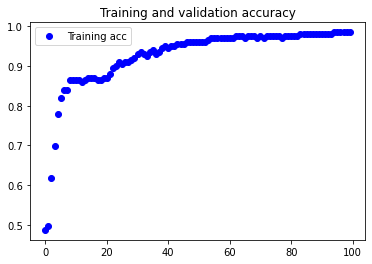


Test accuracy: 0.9735099077224731


In [63]:
import matplotlib.pyplot as plt
plt.plot(list(range(100)), history.history["accuracy"], 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)